## Introduction: 
## Database: 
Database classifying  people into 16 distinct personality types showing their last 50 tweets, separated by "|||". 
#Goal: Creating some new metric(col) to prepare a predictive model.

# Importing Libraries

In [1]:
import re
import numpy as np
import collections
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Importing Dataset


In [2]:
df = pd.read_csv('mbti_1.csv')
print(df.head(20))
print('-'*40)
print(df.info())

    type                                              posts
0   INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1   ENTP  'I'm finding the lack of me in these posts ver...
2   INTP  'Good one  _____   https://www.youtube.com/wat...
3   INTJ  'Dear INTP,   I enjoyed our conversation the o...
4   ENTJ  'You're fired.|||That's another silly misconce...
5   INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6   INFJ  'No, I can't draw on my own nails (haha). Thos...
7   INTJ  'I tend to build up a collection of things on ...
8   INFJ  I'm not sure, that's a good question. The dist...
9   INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
10  INFJ  'One time my parents were fighting over my dad...
11  ENFJ  'https://www.youtube.com/watch?v=PLAaiKvHvZs||...
12  INFJ  'Joe santagato - ENTP|||ENFJ or  ENTP?   I'm n...
13  INTJ  'Fair enough, if that's how you want to look a...
14  INTP  'Basically this...  https://youtu.be/1pH5c1Jkh...
15  INTP  'Your comment screams INTJ, br

## From the data above, we found there's no null input, hence we can skip the data cleansing step.
## Checking if words per comment could give us some inference.

In [3]:
df['words_per_com'] = df['posts'].apply(lambda x: len(x.split())/50)
print(df.head());

   type                                              posts  words_per_com
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...          11.12
1  ENTP  'I'm finding the lack of me in these posts ver...          23.40
2  INTP  'Good one  _____   https://www.youtube.com/wat...          16.72
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...          21.28
4  ENTJ  'You're fired.|||That's another silly misconce...          19.34


# Visual Analysis using violin plot:

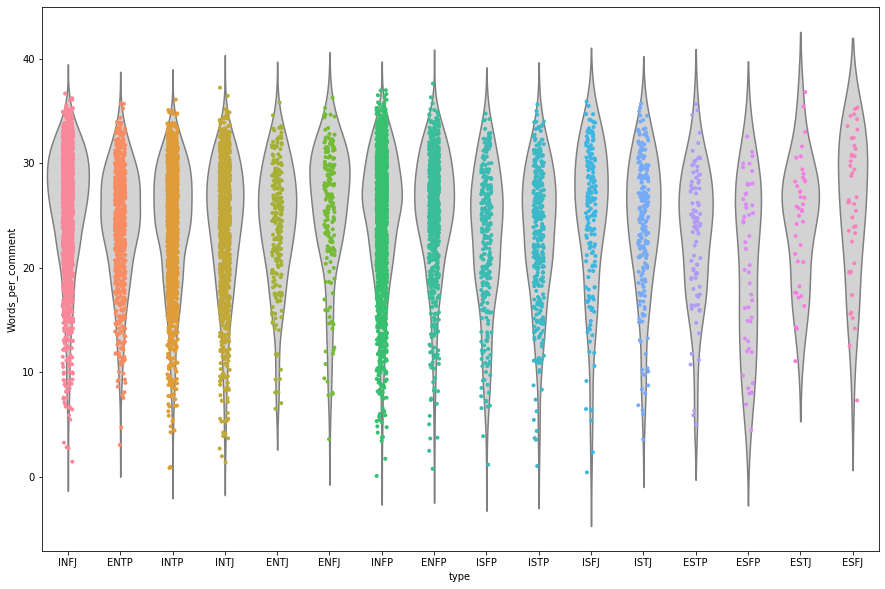

In [4]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_com', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y ='words_per_com', data=df, size=4)
plt.ylabel('Words_per_comment')
plt.show()

# Drawing some more inferences
## We can look for no. of diff charachteristics being used like '?', '!' etc. to check if some relationship exists;

<Figure size 1440x1440 with 0 Axes>

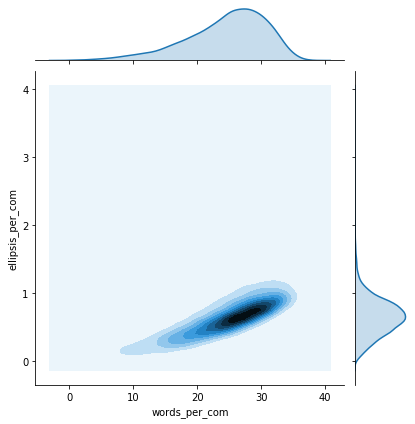

<Figure size 1440x1440 with 0 Axes>

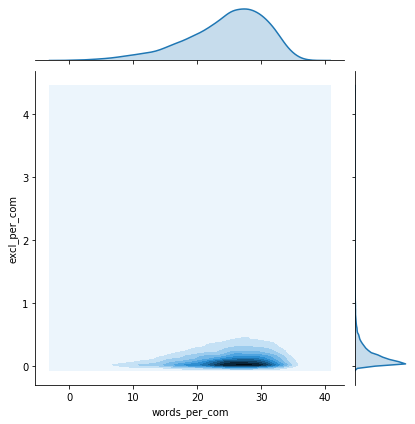

<Figure size 1440x1440 with 0 Axes>

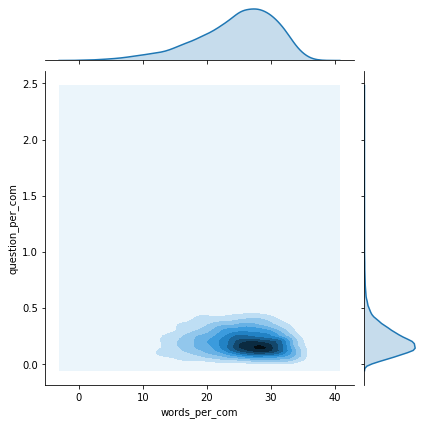

<Figure size 1440x1440 with 0 Axes>

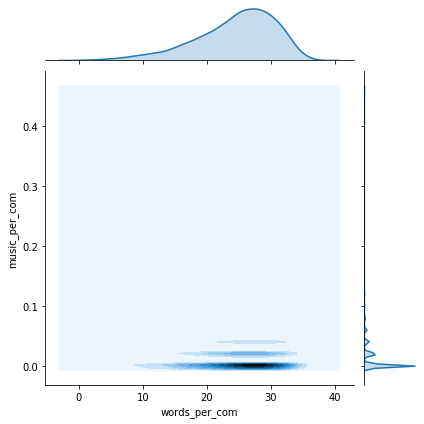

<Figure size 1440x1440 with 0 Axes>

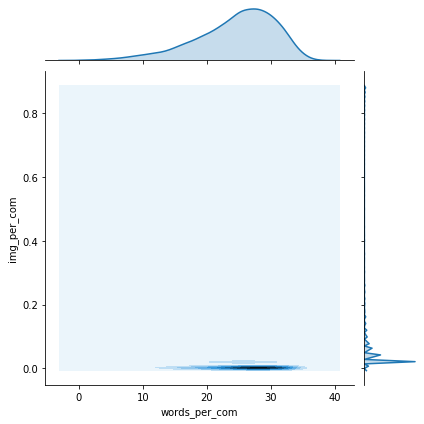

In [5]:
df['http_per_com'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_com'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_com'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_com'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_com'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_com'] = df['posts'].apply(lambda x: x.count('...')/50)

plt.figure(figsize=(20,20))
sns.jointplot(x='words_per_com', y='ellipsis_per_com', data = df, kind='kde')
plt.figure(figsize=(20,20))
sns.jointplot(x='words_per_com', y='excl_per_com', data = df, kind='kde')
plt.figure(figsize=(20,20))
sns.jointplot(x='words_per_com', y='question_per_com', data = df, kind='kde')
plt.figure(figsize=(20,20))
sns.jointplot(x='words_per_com', y='music_per_com', data = df, kind='kde')
plt.figure(figsize=(20,20))
sns.jointplot(x='words_per_com', y='img_per_com', data = df, kind='kde')

seems like '...' and '?' have high correlation with words per comment

# Calculating pearson's correlation coefficient

##For ellipsis:

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
16
0
((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
0
((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0.6399820319539542
1
((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0.7054114704760909
2
((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0.6417417099995271
3
((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0.7418360967765789
1
((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
0
((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((

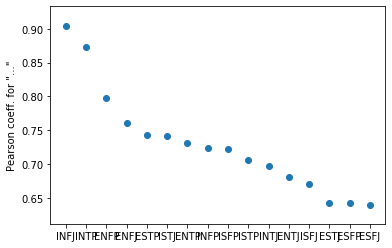

In [6]:
i = df['type'].unique()
print('$'*40)
print(len(i))
k = 0
TypeArray = []
PearArray = []

for m in range(0,4):
    print(m)
    print('('*100)
    for n in range(0,4):
        print(n)
        print('('*100)
        df_2 = df[df['type'] == i[k]]
        #print('%'*40)
        #print(df_2)
        print('%'*40)
        pearsoncoef1 = np.corrcoef(x=df_2['words_per_com'], y=df_2['ellipsis_per_com'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1
        
TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.ylabel('Pearson coeff. for "..."')
plt.scatter(TypeArray, PearArray)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
-0.20059983087581515
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0.001595428401122054
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
-0.1675353752750199
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
-0.06489290646518699
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0.025116115218628297
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0.050465420416297604
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
-0.18500317241693257
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
-0.025985838800229817
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
-0.1119496648516339
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
-0.19388067263924413
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
-0.2908921440244246
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
-0.055020925830082175
[0.050465420416297604, 0.025116115218628297, 0.001595428401122054, -0.025985838800229817, -0.055020925830082175, -0.06489290646518699, -0.1119496648516339, -0.1675353752750199, -0.18500317241693257, -0.19388067263924413, -0.20059983087581515, -0.29089214402

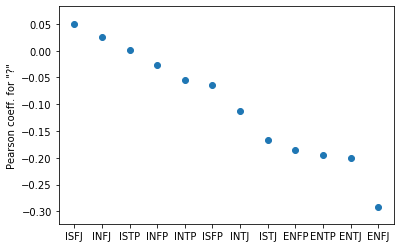

In [7]:
i = df['type'].unique()
k = 0
TypeArray = []
PearArray = []

for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        print('%'*40)
        #print(df_2)
        #print('%'*40)
        pearsoncoef1 = np.corrcoef(x=df_2['words_per_com'], y=df_2['question_per_com'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1
        
TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.ylabel('Pearson coeff. for "?"')
plt.scatter(TypeArray, PearArray)

Since classifying into 16 categories would be counter intuitive and we'll have to scale it down so that we could see it more intuitively:

# Dividing data into four small categories: introversion?extroversion?intuitinon?sensing

In [8]:
map1 = {"I":0, "E": 1}
map2 = {"N":0, "S": 1}
map3 = {"T":0, "F": 1}
map4 = {"J":0, "P": 1}
#basically here we are labelling our data for the four groupings, with schema defined within the map, 
#e.g.. I:0, E:1 ->for the field I-E will hold 0 if it's of the category of I, else 1.
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)

df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)

df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)

df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)

print(df.head(10))

   type                                              posts  words_per_com  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...          11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...          23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...          16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...          21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...          19.34   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...          29.82   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...          26.58   
7  INTJ  'I tend to build up a collection of things on ...          24.46   
8  INFJ  I'm not sure, that's a good question. The dist...          14.76   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...          24.66   

   http_per_com  music_per_com  question_per_com  img_per_com  excl_per_com  \
0          0.48           0.02              0.36         0.12          0.

# Building Machine Learning Models:

In [9]:
x = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values

#print(df.head(1))
print(x.shape)
print(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)
y_pr = [[23.4,0.20,0.0,0.1,0.02,0.00,0.38]]
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
sgd.score(x_train,y_train)
#print(y_pred)
#print('!'*100)
#print(y_test)
acc_sgd = round(sgd.score(x_test,y_pred)*100, 2)
#acc_sgd = round(sgd.score(x_train,y_train)*100, 2)
print(round(acc_sgd,2,), "%")
print(accuracy_score(y_test,y_pred))
sgd.predict(y_pr)

(8675, 7)
['INFJ' 'ENTP' 'INTP' ... 'INTP' 'INFP' 'INFP']
100.0 %
0.1497695852534562


array(['ENTP'], dtype='<U4')

In [24]:
x

array([[1.112e+01, 4.800e-01, 2.000e-02, ..., 1.200e-01, 6.000e-02,
        3.000e-01],
       [2.340e+01, 2.000e-01, 0.000e+00, ..., 2.000e-02, 0.000e+00,
        3.800e-01],
       [1.672e+01, 1.000e-01, 0.000e+00, ..., 0.000e+00, 8.000e-02,
        2.600e-01],
       ...,
       [1.896e+01, 4.000e-02, 0.000e+00, ..., 0.000e+00, 2.000e-02,
        3.800e-01],
       [3.410e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 6.000e-02,
        9.400e-01],
       [2.722e+01, 6.000e-02, 0.000e+00, ..., 0.000e+00, 1.000e-01,
        4.800e-01]])

In [10]:
print(x_test[0])

[2.814e+01 0.000e+00 2.000e-02 4.000e-01 0.000e+00 4.000e-02 6.000e-01]


# Applying Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train,y_train)
yrf_pred = rf.predict(x_test)
print(rf.score(x_train,y_train))
print(accuracy_score(y_test,yrf_pred))
rf.predict(y_pr)

1.0
0.19009216589861752


array(['ENTP'], dtype=object)

# Logistic Regression

In [17]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
ylr_pred = lr.predict(x_test)
print(lr.score(x_train,y_train))
print(accuracy_score(y_test,ylr_pred))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.23248366850262586
0.22465437788018433


# KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
yknn_pred = knn.predict(x_test)
print(knn.score(x_train,y_train))
print(accuracy_score(y_test,yknn_pred))

0.47342128858716537
0.13940092165898618


# Checking if we could predict one being extrovert or introvert

In [38]:
xx = df.drop(['type','posts','I-E'], axis = 1).values
yy = df['I-E'].values

print(yy.shape)
print(xx.shape)

xx_train,xx_test,yy_train,yy_test = train_test_split(xx,yy, test_size= 0.2)

sgdd = SGDClassifier(max_iter = 5,tol=None)
sgdd.fit(xx_train,yy_train)
yysgdd_pred = sgdd.predict(xx_test)
sgdd.score(xx_train,yy_train)
print(sgdd.score(xx_train,yy_train))
print(accuracy_score(yy_test,yysgdd_pred))

(8675,)
(8675, 10)
0.26772334293948125
0.276657060518732


# Random Forest

In [43]:
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(xx_train,yy_train)
yyrf_pred = rf1.predict(xx_test)
rf1.score(xx_train,yy_train)
print(rf1.score(xx_train,yy_train))
accuracy_score(yy_test,yyrf_pred)

1.0


0.7636887608069164

# Logistic Regression

In [45]:
lr1 = LogisticRegression()
lr1.fit(xx_train,yy_train)
yylr1_pred = lr1.predict(xx_test)

print(lr1.score(xx_train,yy_train))
accuracy_score(yy_test,yylr1_pred)

0.7729106628242075


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7648414985590778

In [49]:
#knn
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(xx_train,yy_train)

yknn1_pred = knn1.predict(xx_test)

print(knn1.score(xx_train,yy_train))
accuracy_score(yknn1_pred, yy_test)

0.8420749279538905


0.7106628242074928